# Preprocessing

In [4]:
import pandas as pd
import matplotlib as plt
import matplotlib as gridspec
df = pd.read_csv('GermanCredit.csv')

In [5]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


## 1.

In [6]:
checklist = {}
for col in df.columns:
    if df[col].value_counts().index[0] == 'none':
        checklist[col] = df[col].value_counts()
n = 3
out = dict(list(checklist.items())[0: n])
df.drop(out, axis=1, inplace=True)

## 2.

In [7]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = df[col].str.replace(r"[\']", '')

/var/folders/tf/6k8gnmz13939wxr24vs_1jc40000gn/T/ipykernel_63677/3796214084.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace(r"[\']", '')


## 3.

In [8]:
df['checking_status'] = df['checking_status'].replace(['no checking', '<0', '0<=X<200', '>=200'], ['No Checking', 'Low', 'Medium', 'High'])

## 4.

In [9]:
df['savings_status'] = df['savings_status'].replace(['no known savings', '<100', '100<=X<500', '500<=X<1000', '>=1000'], ['No Savings', 'Low', 'Medium', 'High', 'High'])

## 5.

In [10]:
df['class'] = df['class'].replace(['good', 'bad'], [1, 0])
df['employment'] = df['employment'].replace(['unemployed', '<1', '1<=X<4', '4<=X<7', '>=7'], ['Unemployed', 'Amateur', 'Professional', 'Experienced', 'Expert'])

# Analysis

## 1. a

In [11]:
pd.crosstab(df['foreign_worker'], df['class'].replace([1, 0], ['good', 'bad']))

class,bad,good
foreign_worker,,
no,4,33
yes,296,667


## 1. b

In [12]:
pd.crosstab(df['employment'], df['savings_status'])

savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


## 2.

In [13]:
df[(df['personal_status'] == 'male single') & (df['employment'] == 'Experienced')]['credit_amount'].mean()

4142.592592592592

## 3.

In [14]:
df['duration'].groupby(df['job']).mean()

job
high qualif/self emp/mgmt    25.168919
skilled                      21.411111
unemp/unskilled non res      17.363636
unskilled resident           16.535000
Name: duration, dtype: float64

## 4.

In [15]:
common_checking_status = df[df['purpose'] == 'education']['checking_status'].mode().tolist()
common_saving_status = df[df['purpose'] == 'education']['savings_status'].mode().tolist()
print('Most common checking status:',common_checking_status[0])
print('Most common checking saving:',common_saving_status[0])

Most common checking status: No Checking
Most common checking saving: Low


# Visualization

## 1.

In [16]:
gs = gridspec.GridSpec(2, 2)
plt.figure(figsize=(8,8))
personal_status_labels = df['personal_status'].unique()
ax1 = plt.subplot(gs[0, 0])
plt.hist([df.loc[df.personal_status == x, 'savings_status'] for x in personal_status_labels])
plt.legend(personal_status_labels)
ax2 = plt.subplot(gs[0, 1])
plt.hist([df.loc[df.personal_status == x, 'checking_status'] for x in personal_status_labels])
plt.legend(personal_status_labels)


AttributeError: module 'matplotlib' has no attribute 'GridSpec'

## 2.

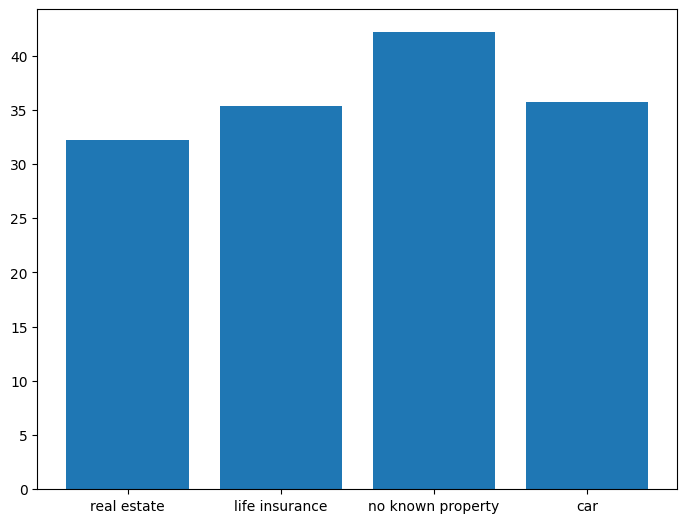

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
df2 = df[df['credit_amount'] > 4000]
x_axis = df2.property_magnitude.unique()
y_axis = df2['age'].groupby(df['property_magnitude']).mean()
ax.bar(x_axis, y_axis)


## 3.

([<matplotlib.patches.Wedge at 0x7f54ccdb8880>,
 [Text(-0.4323276051691073, 1.011480519737649, 'skilled'),
  Text(0.14765678776635321, -1.0900447114804612, 'unskilled resident'),
  Text(1.0298584428744788, -0.38651207955270156, 'high qualif/self emp/mgmt'),
  Text(1.0955717452710456, -0.0986029967280674, 'unemp/unskilled non res')])

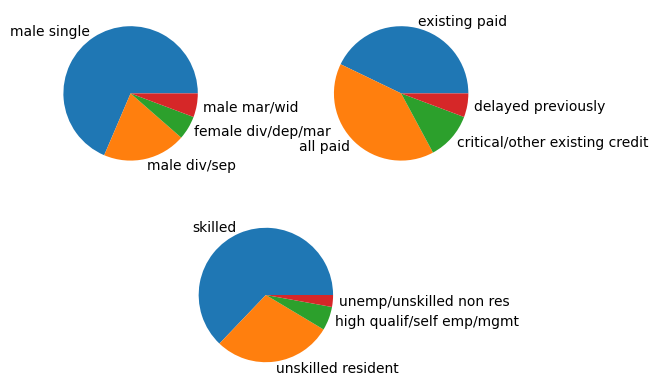

In [ ]:
df2 = df[(df['savings_status'] == 'High') & (df['age'] > 40)]
gs = gridspec.GridSpec(2, 2)
plt.figure()
ax1 = plt.subplot(gs[0, 0])
plt.pie(df2['personal_status'].value_counts(), labels=df2['personal_status'].unique())
ax2 = plt.subplot(gs[0, 1])
plt.pie(df2['credit_history'].value_counts(), labels=df2['credit_history'].unique())
ax3 = plt.subplot(gs[1, :])
plt.pie(df2['job'].value_counts(), labels=df2['job'].unique())
